# Classify record data by Decision Tree 

## Introduction

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In this document, I use the decision tree classification algorithm in scikit-learn to classify my cleaned record data. To improve the accuracy of the classifier, I also perform parameter selection to improve the performance of the model by reducing the number of parameters and eliminating some parameters that are not highly relevant. Next, I debug the parameters of the model through a series of methods to find the most suitable hyperparameters for the model, and train the optimal model to arrive at the final classifier.

The dataset used is a cleaned credit score dataset. The reason for using decision trees for this dataset is that I tried this dataset with two methods (decision trees and SVM) before formally completing this document, and the classification results of SVM were very poor and unsatisfactory, so I decided to use decision tree classification for this dataset.

## Theory

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![](dt.png)

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

The basic idea behind any decision tree algorithm is as follows:

* Select the best attribute using Attribute Selection Measures(ASM) to split the records.
* Make that attribute a decision node and breaks the dataset into smaller subsets.
* Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * here are no more remaining attributes.
    * There are no more instances.

## Methods

In [2]:
import pandas as pd

In [3]:
record = pd.read_csv("clean_record_data.csv")
record.head()

,Unnamed: 0,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,...,0,1,0,0,0,0,1,0,0,0
1,1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,...,0,1,0,0,0,0,0,1,0,0
2,3,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,...,0,1,0,0,0,0,0,0,0,1
3,4,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,...,0,1,0,0,0,1,0,0,0,0
4,5,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,...,0,1,0,0,0,1,0,0,0,0


In [4]:
record = record.drop(columns=['Unnamed: 0'])

**Normalize the data and divide it into a training set and a test set**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = record.drop(columns=['Credit_Score'])
y = record['Credit_Score']

scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**See the shape of data and Count the distribution of the labels**

In [6]:
# Show the shape of the train and test sets, and levels of the depencent variable (Y) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(record['Credit_Score'].value_counts())

(78239, 39)
(19560, 39)
(78239,)
(19560,)
1    52020
0    28328
2    17451
Name: Credit_Score, dtype: int64


## Baseline Model

**Decision Tree Model on Recorded Data**

Use DecisionTreeClassifier() function to build the model and fit data. Here I set the initial parameter max_depth=6. Then make predictions on both training set and test set.

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=6)
model = model.fit(X_train, y_train)

In [8]:
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

**Confusion matrix of training set.**

In the confusion matrix, we can visualize how well the model is classified, how much data is correctly classified and how much data is incorrectly classified. For a multi-category problem, for example, this dataset has three categories of labels, so the size of the confusion matrix is $3\times 3$. Also compute the accuracy, precision and recall for the resutls.

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

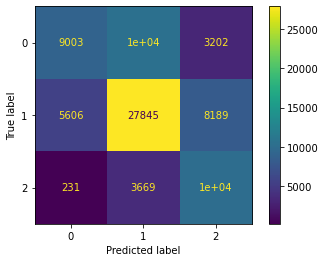

In [10]:
cm1 = confusion_matrix(y_train, yp_train, labels=model.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp1.plot()
plt.show()

Confusion matrix of test set.

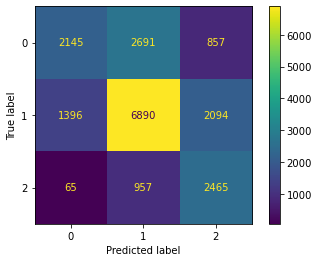

In [11]:
cm2 = confusion_matrix(y_test, yp_test, labels=model.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp2.plot()
plt.show()

**Visualize the tree.**

First we visualilze the tree in a text version. This is due to the fact that the amount of data is relatively large and drawing the graph takes a long time, while the text version allows us to see the results more quickly.

In [12]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= -0.30
|   |--- feature_0 <= 0.32
|   |   |--- feature_38 <= 0.56
|   |   |   |--- feature_14 <= 2.01
|   |   |   |   |--- feature_4 <= -1.24
|   |   |   |   |   |--- feature_4 <= -1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_4 >  -1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  -1.24
|   |   |   |   |   |--- feature_2 <= -1.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -1.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_14 >  2.01
|   |   |   |   |--- feature_10 <= 0.26
|   |   |   |   |   |--- feature_7 <= 0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.13
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_10 >  0.26
|   |   |   |   |   |--- feature_17 <= 2.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_17 >  2.36
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_38 >  0.56

Then use graphviz package to visualize the tree. In the graph we can see the tree is pretty wide.

In [13]:
import graphviz
def plot_tree(model,X,Y):
    dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X,  
                                class_names=Y)

    graph = graphviz.Source(dot_data, format="png") 
    return graph

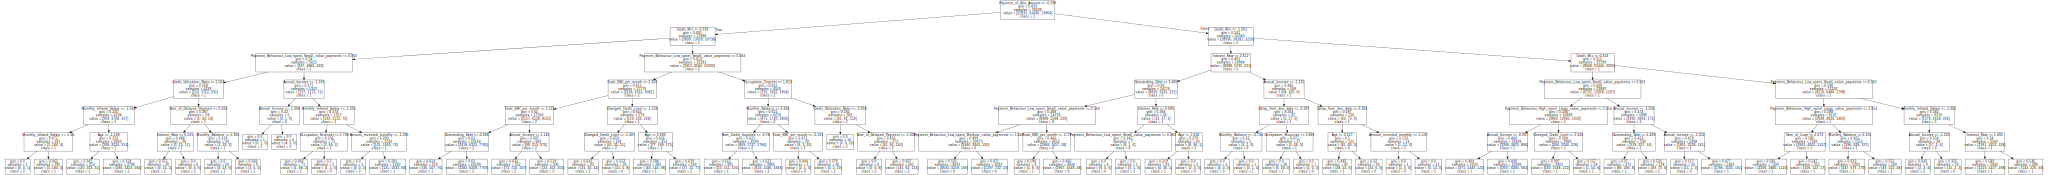

In [14]:
feature_names = record.columns.delete(2)
class_names = ["0","1","2"]
plot_tree(model,feature_names,class_names)

**Accuracy, precision and recall**

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy(train) of model is {}%".format(accuracy_score(y_test,yp_test) * 100))
print("Accuracy(test) of model is {}%".format(accuracy_score(y_train,yp_train) * 100))

Accuracy(train) of model is 58.79345603271984%
Accuracy(test) of model is 59.959866562711696%


In [16]:
from sklearn.metrics import classification_report
# train
print("------TRAIN------")
print(classification_report(y_train,yp_train))
# test
print("------TEST------")
print(classification_report(y_test,yp_test))

------TRAIN------
              precision    recall  f1-score   support

           0       0.61      0.40      0.48     22635
           1       0.66      0.67      0.67     41640
           2       0.47      0.72      0.57     13964

    accuracy                           0.60     78239
   macro avg       0.58      0.60      0.57     78239
weighted avg       0.61      0.60      0.60     78239

------TEST------
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      5693
           1       0.65      0.66      0.66     10380
           2       0.46      0.71      0.55      3487

    accuracy                           0.59     19560
   macro avg       0.57      0.58      0.56     19560
weighted avg       0.60      0.59      0.58     19560



## Feature Selection

In this part, I used SelctFromModel() function to complete feature selection. Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

In [21]:
X.shape

(97799, 39)

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
selectmodel = SelectFromModel(model, prefit=True)
X_new = selectmodel.transform(X)
X_new.shape

(97799, 2)

## Model Tuning

**Here I used GridSearchCV() function to complete model tuning**

The parameters to be tuned are max_depth, min_samples_leaf and criterion.

In [25]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [26]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [28]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Fit the best model and evaluate the results.

In [29]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.5960454504786615
Train Confusion Matrix:
[[ 8988 10295  3352]
 [ 5735 27311  8594]
 [  221  3408 10335]]
--------------------------------------------------
Test Accuracy : 0.587678936605317
Test Confusion Matrix:
[[2151 2656  886]
 [1404 6782 2194]
 [  63  862 2562]]


Plot the best tree.

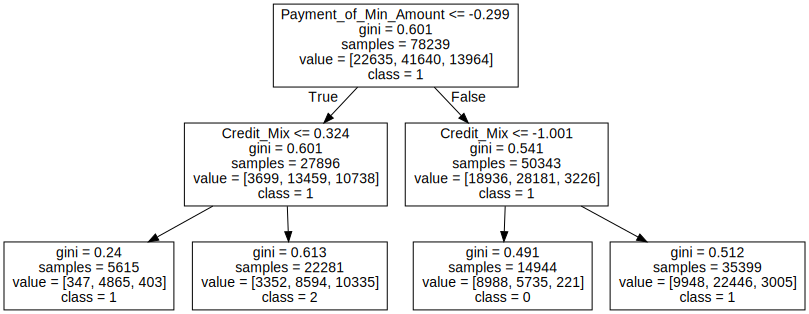

In [30]:
plot_tree(dt_best,feature_names,class_names)

## Results

For data preprocessing, I standardized the data set. For the decision tree model, first I randomly chose the parameter `max_depth=6` and use all the other parameters as default. The result of the baseline model turns out that the performance is not good. The original accuracy score is only about 0.59 which means only 59% of the data were correctly classified. And we could see the tree plot that the original tree was very complex and there were many nodes. So I didn't think it is a good model.

So in order to improve the model performance, I did feature selection and model tuning. In the final result, the best model was given through GridSearch function: `max_depth=2` and `min_samples_leaf=5`. Finally I plot the decision tree and it looked better. But the model accuracy has not changed a lot.

## Conlusions

Here I summarized some pros and cons of the decision tree classifier.

* Pros
    * Decision trees are easy to interpret and visualize.
    * It can easily capture Non-linear patterns.
    * It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
    * It can be used for feature engineering such as predicting missing values, suitable for variable selection.
    * The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)
* Cons
    * Sensitive to noisy data. It can overfit noisy data.
    * The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
    * Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.



## References

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://why-change.com/2021/11/13/how-to-create-decision-trees-for-business-rules-analysis/